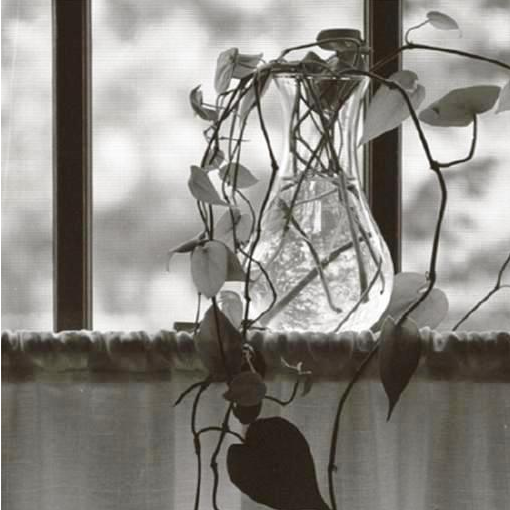

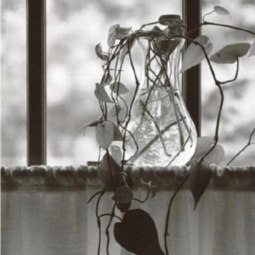

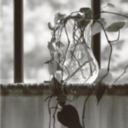

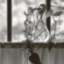

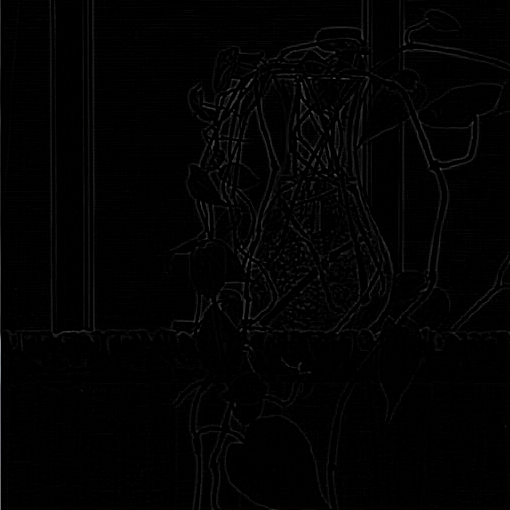

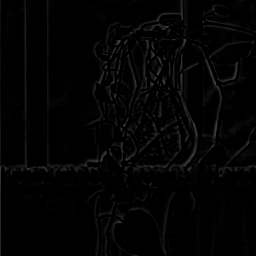

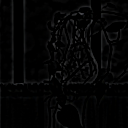

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def downsample(image):
    return cv2.pyrDown(image)

def upsample(image):
    return cv2.pyrUp(image)

# Function to compute prediction residual using bilinear interpolation
def compute_residual(image_downsampled, approx):
    # Ensure the sizes of the images match
    image_downsampled_resized = cv2.resize(image_downsampled, (approx.shape[1], approx.shape[0]))
    return cv2.subtract(image_downsampled_resized, approx)

image = cv2.imread("image.png")

if image is None:
    print("Error: Unable to read the image file.")
else:
    py_images = []
    py_images.append(image)
    residual_images = []

    # Apply downsampling and store images for three levels
    for i in range(1, 4):
        downsampled_image = downsample(image)
        py_images.append(downsampled_image)
        corrected_image = upsample(downsampled_image)
        residual = compute_residual(py_images[i-1], corrected_image)
        residual_images.append(residual)
        image = downsampled_image

    # Display downsampled images
    for py_image in py_images:
        cv2_imshow(py_image)

    # Display prediction residuals
    for residual in residual_images:
        cv2_imshow(residual)
